In [37]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import datetime
import matplotlib.pyplot as plt

In [48]:
def plot_missing_dates_on_timeline(start, end, missing, title = "Missing timeslots"):
    """Plot missing dates on timeline

    Args:
        min (datetime): start date on timeline
        max (datetime): end date on timeline
        missing (list): list of missing dates in the interval
        title (str, optional): Plot title. Defaults to "Missing timeslots".
    """
    
    # Plot missing timeslot values 
    # Inspired by https://matplotlib.org/3.5.1/gallery/lines_bars_and_markers/timeline.html

    # Choose some nice levels
    levels = np.tile([-5, 5, -3, 3, -1, 1],
                    int(np.ceil(len(missing)/6)))[:len(missing)]

    # Create figure and plot a stem plot with the date
    fig, ax = plt.subplots(figsize=(8.8, 4), constrained_layout=True)
    ax.set(title=title)

    ax.vlines(missing, 0, levels, color="tab:red")  # The vertical stems.
    ax.plot(missing, np.zeros_like(missing), "-o",
            color="k", markerfacecolor="w")  # Baseline and markers on it.

    # remove y axis and spines
    ax.yaxis.set_visible(False)
    ax.spines[["left", "top", "right"]].set_visible(False)

    # Set x-axis interval
    ax.set_xlim(start, end)

    ax.margins(y=0.1)
    plt.show()

def get_missing_hours(dates):
    """List of hour

    Args:
        dates (list:datetime): list of hours

    Returns:
        list:datetime: list of missing hours in timeseries
    """
    date_set = set(dates[0] - datetime.timedelta(hours = x) for x in range(int(((dates[-1] - dates[0]) / datetime.timedelta(hours=1)/24))))
    missing  = sorted(date_set - set(dates))
    return missing

In [39]:
df = pd.read_csv("data/28ba7f57-6e83-4341-8078-232c1639e4e3_AGGREGATED.csv")

In [62]:
# print(df[df["type"] == "consumption"].describe())
# print(df[df["type"] == "production"].describe())

In [64]:
# Convert timeslot to datetime
df.index = pd.to_datetime(df["timeslot"], utc=True)

df_prod =  df[df["type"] == "production"]
df_cons = df[df["type"] == "consumption"]

There are 0 missing timeslots in the consumption data from start to end
There are 0 missing timeslots in the production data from start to end


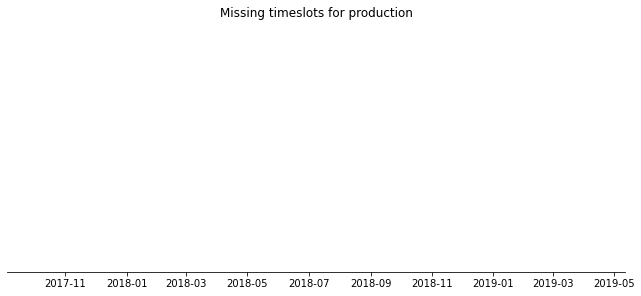

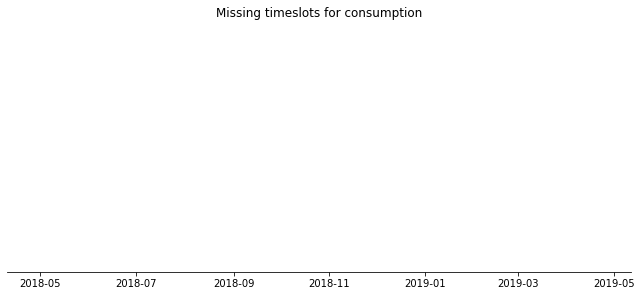

In [66]:
missing_prod = get_missing_hours(df_prod.index)
missing_cons = get_missing_hours(df_cons.index)

print(f"There are {len(missing_prod)} missing timeslots in the consumption data from start to end")
print(f"There are {len(missing_cons)} missing timeslots in the production data from start to end")

plot_missing_dates_on_timeline(df_prod.index[0], df_prod.index[-1], missing_cons, "Missing timeslots for production")
plot_missing_dates_on_timeline(df_cons.index[0], df_cons.index[-1], missing_cons, "Missing timeslots for consumption")


In [77]:
# Print intervals
print("Production: ",  min(df_prod.index), max(df_prod.index)) 
print("Consumption: ", min(df_cons.index), max(df_cons.index)) 

Production:  2016-09-04 22:00:00+00:00 2019-05-14 21:00:00+00:00
Consumption:  2016-09-03 22:00:00+00:00 2019-05-14 21:00:00+00:00
